تمرین 1-2

یک طبقه بند برای دیتاست Fashion MNIST بنویسید.

این دیتاست قبلا در کراس موجود است و کافی است با دستور:

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

لود کنید سپس:

الف: تعداد کلاس ها را چاپ کنید

ب: چند تصویر از این دیتاست را نمایش دهید

ج: داده را نرمال کرده و مناسب آموزش برای یک شبکه عصبی آماده کنید

د: یک شبکه تمام متصل (FC) آموزش دهید. bold text

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.14.0


Load a Fashion MNIST dataset :

Fashion-MNIST is a dataset comprising of 28×28 grayscale images of 70,000 fashion products from 10 categories, with 7,000 images per category. The training set has 60,000 images and the test set has 10,000 images. Images are items of 10 types of clothing, such as shoes, t-shirts, dresses, and more. The mapping of all 0-9 integers to class labels is listed below.

    class labels:

    0: T-shirt/top
    1: Trouser
    2: Pullover
    3: Dress
    4: Coat
    5: Sandal
    6: Shirt
    7: Sneaker
    8: Bag
    9: Ankle boot


In [153]:
#load data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [154]:
# Describtion of input dataset
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


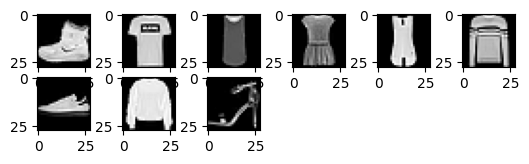

In [124]:
#plot first 9 images which refer to 10 classes
import matplotlib.pyplot as plt
for i in range(9):
  plt.subplot(660+1+i)
  plt.imshow(train_images[i],cmap= 'gray')

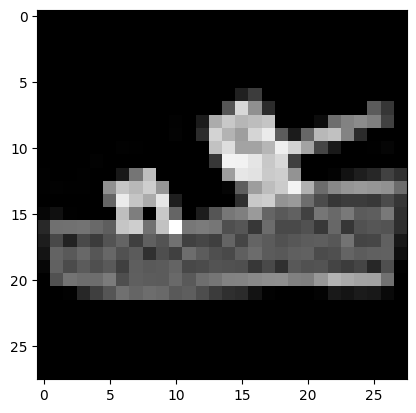

In [72]:
plt.imshow(train_images[12],cmap= 'gray')

In [155]:
#Convert to float32 then Normalize data to range(0-1)
train_images = train_images.astype('float32')
test_images  = test_images.astype('float32')
train_images, test_images = train_images / 255, test_images / 255

In [156]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [157]:
#model.compile(optimizer=tf.keras.optimizers.Adam(learning-rate= 0.09),
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ['accuracy'])

In [162]:
#history = model.fit(train_images, train_labels, epochs=10,batch_size=64, validation_split=0.2)
history = model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2755 - accuracy: 0.8970
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2717 - accuracy: 0.8978
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2637 - accuracy: 0.9015
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2616 - accuracy: 0.9026
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2570 - accuracy: 0.9033
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2515 - accuracy: 0.9052
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2488 - accuracy: 0.9067
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2425 - accuracy: 0.9098
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2399 - accuracy: 0.9095
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.236

In [163]:
model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.3615 - accuracy: 0.8838 - 320ms/epoch - 1ms/step


[0.36150601506233215, 0.8838000297546387]

In [164]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

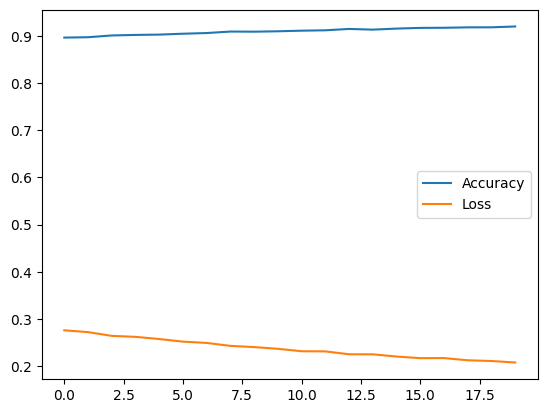

In [165]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['Accuracy','Loss'])